# 파이썬을 활용한 머신러닝
## 스피어 피싱 모의훈련 서비스 제작

#### 주제 : 개인에 대한 스피어피싱 문구 제작. 
1안 : 개인에 대한 스피어피싱 문구를 제작하는데 포스트를 작성할 때 사용자가 링크를 누르기 위해 최적의 개인에 맞는 스피어피싱 문구를 유발해 정확도를 높여가는 과정. 
2안 : 미리 사전에 키워드에 맞는 문구를 정의해놓고 키워드가 주어지면 우리가 정의한 문장이 놓여짐. 하지만 머신러닝이 아니니 의의가 없어 목적에 맞지는 않지만 완벽하지 않은 완성도의 수동적인 면. 여기까지 가능. 

<strong>idea : </strong> 
1. sqlite 데이터베이스 이용 
2. 본래 1안을 하다가 2안을 채택하는 식을 선택하려고 했지만 쉬운 쪽인 2안을 먼저 해보는 식.
3. 크롤링 => 데이터베이스 => 각 사용자의 텍스트나 프로필에서 자연어 처리를 수행
4. 여기서 자연어 처리는 각 형태소로 나누고 의미를 파악하는 것.
5. 머신러닝을 돌려 최적의 문장을 키워드에서 맞게 선택해 가져오자.
=> 스피어 피싱 모의훈련 서비스에 대한 결과를 출력

###  통합
<strong>수정된 통합 코드 : </strong>
1. 키워드를 리스트에서 인덱싱하는 형식이 아니라 문자열에 연산자를 추가했음.
2. 이에 따라 반복문을 통해 시트를 추가하는 형식이 아닌 한 시트에 지정된 키워드에 대한 데이터프레임을 담기로 함.
3. 이때 길이가 겁나 많아서(9400 이상) 일단은 길이제한을 두기로 함.

### 수정된 중간 통합 코드, 데이터셋 생성

In [73]:
import tweepy
import pandas as pd
import time

consumer_key = "oCfme0qMTyYybPUU0ABwKNHKg"
consumer_secret = "1VP4phAtG0Y1ILTe5RGL7XYGHkNrWEzzxv8fk0cWym1p9yfNIO"
access_token = "2910321932-RkciOAbw8WYB2nIISDrFSREfbDnxDIydAdX2mLB"
access_token_secret = "faRZmsdWYWQ8mLdYN40qmj7B5eA0Ifl9RglLohzi8fCqa"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth, wait_on_rate_limit=True)

keyword = '여자친구 OR 방탄소년단 OR 엑소'

results = []
ap = results.append

for tweet in tweepy.Cursor(api.search, q=keyword, count=100).items():
    if(len(results)<=100):
        ap(tweet)
        #print(len(results))
    else:
        break

def process_results(results):
    id_list = [tweet.id for tweet in results]
    data_set = pd.DataFrame(id_list, columns=["id"])

    # Processing Tweet Data
    data_set["text"] = [tweet.text for tweet in results]
    data_set["created_at"] = [tweet.created_at for tweet in results]
    data_set["retweet_count"] = [tweet.retweet_count for tweet in results]
    data_set["favorite_count"] = [tweet.favorite_count for tweet in results]
    data_set["source"] = [tweet.source for tweet in results]

    # Processing User Data
    data_set["user_id"] = [tweet.author.id for tweet in results]
    data_set["user_screen_name"] = [tweet.author.screen_name for tweet in results]
    data_set["user_name"] = [tweet.author.name for tweet in results]
    data_set["user_created_at"] = [tweet.author.created_at for tweet in results]
    data_set["user_description"] = [tweet.author.description for tweet in results]
    data_set["user_followers_count"] = [tweet.author.followers_count for tweet in results]
    data_set["user_friends_count"] = [tweet.author.friends_count for tweet in results]
    data_set["user_location"] = [tweet.author.location for tweet in results]

    return data_set

data_set = process_results(results)
writer = pd.ExcelWriter('multi_df_to_excel.xlsx')
data_set.to_excel(writer,sheet_name='x')
writer.save()

### 변경 내용 파일 저장

In [70]:
def to_excel():
    writer = pd.ExcelWriter('multi_df_to_excel.xlsx')
    data_set.to_excel(writer,sheet_name='x')
    writer.save()
def excel_to():
    data_set = pd.read_excel('multi_df_to_excel.xlsx', sheetname='x')

to_excel()
excel_to()
data_set.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,id,text,created_at,retweet_count,favorite_count,source,user_id,user_screen_name,user_name,user_created_at,user_description,user_followers_count,user_friends_count,user_location,rtwi
0,1130360366024859649,"RT @exohatch: .\n.\n\n""بالاد خوان های تاپ کلاس...",2019-05-20 06:31:26,2,0,Twitter for Android,1039463704046329856,Fatemeexo3,Fateme_exo,2018-09-11 10:40:34,im perfect.because im EXO_L,110,28,,https://twitter.com/@exohatch
1,1130360365798178817,RT @fate_jimin: 190519 SYS in NJ HD \n #지민 #...,2019-05-20 06:31:26,7496,0,Twitter for Android,1075388752921411584,ARMY__890nut,yoonji~~~,2018-12-19 13:53:53,เมนจีมิน​ เหนือ​เมนชูก้า รองเมนจองกุก​\nชิป ...,13,375,,https://twitter.com/@fate_jimin
2,1130360362555961350,"RT @BigHitEnt: [기사] #방탄소년단, 아미와 함께 美 스타디움 투어 성...",2019-05-20 06:31:26,9948,0,Twitter for iPhone,1094763343150084096,uuurgirl,asyifa.,2019-02-11 01:01:35,bts’s full time lover. kim taehyung biased.,204,243,,https://twitter.com/@BigHitEnt


### 관계 시각화

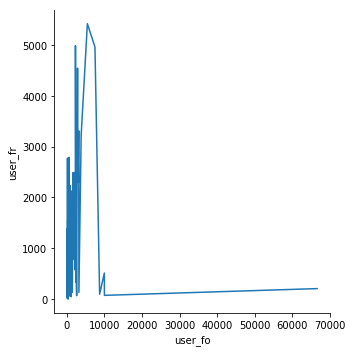

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
"""from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()"""
%matplotlib inline

arr1 = list(data_set['user_followers_count'])
arr2 = list(data_set['user_friends_count'])
data_set_m = pd.DataFrame()
data_set_m['user_fo'] = arr1
data_set_m['user_fr'] = arr2
#print(data_set_m)

"""
p = figure(plot_width=800, plot_height=400)
p.circle(data_set_m['user_fo'],data_set_m['user_fr'],size=10)
show(p)"""
sns.relplot(x = 'user_fo', y= 'user_fr',data=data_set_m,kind='line')
#plt.scatter(data_set_m['user_fo'],data_set_m['user_fr'])

### 데이터베이스

In [24]:
import sqlite3
con = sqlite3.connect("C:/Users/USER/kospi.db")
type(con)

sqlite3.Connection

In [25]:
data_set.to_sql("crawli",con)
cursor = con.cursor()
con = sqlite3.connect("C:/Users/USER/kospi.db")
df = pd.read_sql("SELECT * FROM crawli",con,index_col=None)
df

-----------------------------------

###  2차 통합 수정
<strong>수정된 통합 코드 : </strong>
1. 크롤링 상황을 백분율로 표시
2. 데이터베이스에 테이블 업로드
3. 컬럼 삭제 및 리트윗 아이디 추가 통합

### 2차 통합 수정 코드

In [5]:
import tweepy
import pandas as pd
import time
import sqlite3

consumer_key = "oCfme0qMTyYybPUU0ABwKNHKg"
consumer_secret = "1VP4phAtG0Y1ILTe5RGL7XYGHkNrWEzzxv8fk0cWym1p9yfNIO"
access_token = "2910321932-RkciOAbw8WYB2nIISDrFSREfbDnxDIydAdX2mLB"
access_token_secret = "faRZmsdWYWQ8mLdYN40qmj7B5eA0Ifl9RglLohzi8fCqa"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth, wait_on_rate_limit=True)

keyword = '여자친구 OR 방탄소년단 OR 엑소'

results = []
ap = results.append
uy = float(1000)

print("Make Crawling Dataset")
for tweet in tweepy.Cursor(api.search, q=keyword, count=100).items():
    if(len(results)<uy):
        ap(tweet)
        if(len(results)%100==0):
            #print(len(results),end="")
            print("...............%.2f%%"%(len(results)/uy*100.0),end="\n")
    else:
        break

def process_results(results):
    id_list = [tweet.id for tweet in results]
    data_set = pd.DataFrame(id_list, columns=["id"])

    # Processing Tweet Data
    data_set["text"] = [tweet.text for tweet in results]
    data_set["created_at"] = [tweet.created_at for tweet in results]
    data_set["retweet_count"] = [tweet.retweet_count for tweet in results]
    data_set["favorite_count"] = [tweet.favorite_count for tweet in results]
    data_set["source"] = [tweet.source for tweet in results]

    # Processing User Data
    data_set["user_id"] = [tweet.author.id for tweet in results]
    data_set["user_screen_name"] = [tweet.author.screen_name for tweet in results]
    data_set["user_name"] = [tweet.author.name for tweet in results]
    data_set["user_created_at"] = [tweet.author.created_at for tweet in results]
    data_set["user_description"] = [tweet.author.description for tweet in results]
    data_set["user_followers_count"] = [tweet.author.followers_count for tweet in results]
    data_set["user_friends_count"] = [tweet.author.friends_count for tweet in results]
    data_set["user_location"] = [tweet.author.location for tweet in results]

    return data_set

data_set = process_results(results)
rtwi = [] #rtwl = retweet id
ap = rtwi.append

def retwidadd():
    ke = list(data_set['text'])
    for x in range(len(ke)):
        try:
            kel = ke[x].split()
            kel = kel[1].split(':')
            kel = kel[0]
            if(list(kel)[0]=='@'):
                ap("https://twitter.com/"+kel)
            else:
                ap(0)
        except:
            print("이상한 경우")
            ke = list(data_set['text'])
            print(ke[x])
        #print(rtwi[x],x)
    data_set["rtwi"] = rtwi
    #del data_set["Unnamed: 0"]

def to_excel():
    data_set = process_results(results)
    writer = pd.ExcelWriter('multi_df_to_excel.xlsx')
    data_set.to_excel(writer,sheet_name='x')
    writer.save()


retwidadd()

print("\n")
try:
    con = sqlite3.connect("C:/Users/dsz08/kospi.db") #임의의 DB 생성
    data_set.to_sql("crawli",con) #해당 데이터베이스에 crawli 테이블로 데이터프레임 추가
    cursor = con.cursor() #커서 위치
    df = pd.read_sql("SELECT * FROM crawli",con,index_col=None) #데이터베이스에서 불러오기
except:
    df = pd.read_sql("SELECT * FROM crawli",con,index_col=None)
df.head(10)

Make Crawling Dataset
...............10.00%
...............20.00%
...............30.00%
...............40.00%
...............50.00%
...............60.00%
...............70.00%
...............80.00%
...............90.00%
...............100.00%




,index,id,text,created_at,retweet_count,favorite_count,source,user_id,user_screen_name,user_name,user_created_at,user_description,user_followers_count,user_friends_count,user_location,rtwi
0,0,1130440844215873536,RT @Myeonbae__: Rt) 코튼 런드리 에어팟 케이스 원데이 진행합니다💙\...,2019-05-20 11:51:14,693,0,Twitter for iPhone,2594092838,elfin_0506,ෆ핀୧( •̀ㅅ•́๑)૭✧ෆ,2014-06-29 03:03:00,@B_hundred_Hyun https://t.co/4D6HyHN87Z,59,325,,https://twitter.com/@Myeonbae__
1,1,1130440844069130241,RT @insight_co_kr: 세상 귀여운 찬열의 손하트 ❣️ \n\nChany...,2019-05-20 11:51:14,1665,0,Twitter for iPhone,2343218215,dyodyodyonieee,도경수 ♡dyo(ᵔᴥᵔ),2014-02-14 07:18:28,• just fansgirl’ing acc • i hate fake people •...,466,431,Malaysia,https://twitter.com/@insight_co_kr
2,2,1130440841737015297,RT @M8vgW: #RT 방탄소년단 탈덕해서 공굿 처분합니다\n\n물건 다팔리면 ...,2019-05-20 11:51:13,382,0,Twitter for iPhone,1086319948496916482,king_maggae1013,[100&108인 트친소/구독괄❌]뷔글뷔글한망개 슨생,2019-01-18 17:50:33,@BTS_twt 1208~🖤/20190218:성덕된날💜/언괄=맞언괄/스루고의❌➡️뎀...,2667,3636,In JIMIN,https://twitter.com/@M8vgW
3,3,1130440838515838977,RT @prettytaeV: #RT부탁드려요\n방탄소년단 공식 포카 양도합니다 \n...,2019-05-20 11:51:13,129,0,Twitter Web App,1088973109548376065,btslover0509,💜방탄💜,2019-01-26 01:33:16,07년생 아미예요😊선뎀:💕💕,464,806,,https://twitter.com/@prettytaeV
4,4,1130440837580460037,RT @EXOGlobal: [OFFICIAL] 190520 #CHEN Youtube...,2019-05-20 11:51:12,629,0,Twitter for Android,551613072,simbi_erna,Erna Agus,2012-04-12 03:21:44,Kim Jong Dae's,2,44,,https://twitter.com/@EXOGlobal
5,5,1130440836494254082,RT @HoneyJoonie94: 190519 Speak Yourself Tour ...,2019-05-20 11:51:12,1961,0,Twitter for Android,1008732548929736704,khanittha1995,🍒พี่อ้วงกิของน้อง🍒,2018-06-18 15:25:55,🍒💛🍒💛🍒 #ชูคกี้อยากรีวิว #ของสะสมชูคกี้ ของสะสมข...,165,329,ชป.vga ฮับ;-;,https://twitter.com/@HoneyJoonie94
6,6,1130440835022184448,RT @HoneyJoonie94: 190519 Speak Yourself Tour ...,2019-05-20 11:51:12,2046,0,Twitter for Android,771823520661671936,PaauCortesE,✨ G l i t t e r T r a s h ✨,2016-09-02 21:34:01,✨ Bangtan Sonyeondan ✨ I do belive in your gal...,1572,3659,,https://twitter.com/@HoneyJoonie94
7,7,1130440834241814528,RT @HoneyJoonie94: 190511 Speak Yourself Tour ...,2019-05-20 11:51:12,2735,0,Twitter for iPhone,1051796298649624578,KIMSTUDIO4,studio,2018-10-15 11:25:53,"Pictures can keep memories,but keep it by your...",4,72,,https://twitter.com/@HoneyJoonie94
8,8,1130440833407148032,RT @blacknwhite_km: 190518 SYS in NJ HD\n#JIMI...,2019-05-20 11:51:11,10563,0,Twitter for iPhone,1016974400,GgyungE2,꼉,2012-12-17 08:16:08,,45,650,KOREA 대한민국,https://twitter.com/@blacknwhite_km
9,9,1130440832329428992,"RT @BigHitEnt: [기사] #방탄소년단, '작은 것들을 위한 시' MV 3...",2019-05-20 11:51:11,35345,0,Twitter for iPhone,884536905991368705,tubularpeach,Nena,2017-07-10 22:16:47,,469,170,,https://twitter.com/@BigHitEnt


### 자연어 처리

[konlpy 라이브러리 설치](https://www.youtube.com/watch?v=XQnB0DKlhd8)
1. [whl 파일 다운로드](https://www.lfd.uci.edu/~gohlke/pythonlibs/) 사이트에서  jpype를 Crtl + f로 찾아서 다운로드
2. 위 파일을 다운받은 위치로 가서 

> pip install JPype1-0.6.3-cp37-cp37m-win_amd64.whl

> pip install konlpy

[konlpy 한글 자연어 처리 라이브러리 참고](https://konlpy-ko.readthedocs.io/ko/v0.4.3/)

[한글 및 영어 자연어 처리 참고](https://www.lucypark.kr/courses/2015-dm/text-mining.html)

RT @M8vgW: #RT 방탄소년단 탈덕해서 공굿 처분합니다

물건 다팔리면 알티추첨으로 5만원 드려요
타래에 물건들 있고 시세보다 낮아요ㅠㅠ!
거파 안되고 거파하시면 물건의 절반 거파금 받습니다 ㅜㅜ!
<Text: idol>
114
70
<FreqDist with 70 samples and 114 outcomes>


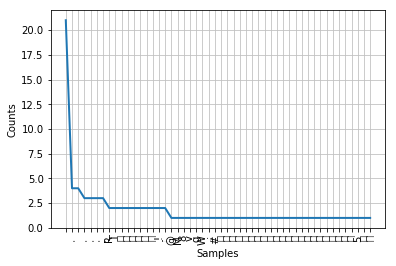

In [20]:
import nltk

ind = list(df["text"])[2]
ko = nltk.Text(ind,name="idol")

print(ind)
print(ko)
print(len(ko.tokens))
print(len(set(ko.tokens)))

ko.vocab()
ko.plot(50)

In [23]:
from konlpy.tag import Twitter; t = Twitter()
tags_ko = t.pos("작고 노란 강아지가 페르시안 고양이에게 짖었다")
tags_ko

[('작고', 'Noun'),
 ('노란', 'Adjective'),
 ('강아지', 'Noun'),
 ('가', 'Josa'),
 ('페르시안', 'Noun'),
 ('고양이', 'Noun'),
 ('에게', 'Josa'),
 ('짖었다', 'Verb')]